# 保险欺诈检测——基于传统决策树、支持向量机、逻辑斯蒂回归模型

### 数据准备

In [52]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [53]:
df = pd.read_csv('D:\python code\data\insurance_claims.csv')

In [54]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014/10/17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006/6/27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000/9/6,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990/5/25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014/6/6,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [55]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [56]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### 数据预处理和特征工程

In [58]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

##### 1、缺失值处理

In [59]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [60]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [61]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [62]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [63]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

##### 2、去掉相关性较低的字段

In [64]:
# 去掉无关字段值

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [65]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [66]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [67]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

##### 3、分离目标值和特征值

In [69]:
# 分离目标值和特征值

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

##### 4、类别型特征编码

In [70]:
# 提取类别型特征
cat_df = X.select_dtypes(include = ['object'])

In [71]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO


In [72]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [73]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [74]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False


##### 5、数值型特征处理

In [75]:
# 提取数值型特征

num_df = X.select_dtypes(include = ['int64'])

In [76]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


##### 6、合并数值型特征和类别型特征

In [77]:

X = pd.concat([num_df, cat_df], axis = 1)

In [78]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,True,False,False,False,False,False,True,True,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,True,False,False,False,False,True,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,True,False,False,False,False,True,False,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,False,False,True,False,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,True,False,False,False,False,False,False,False


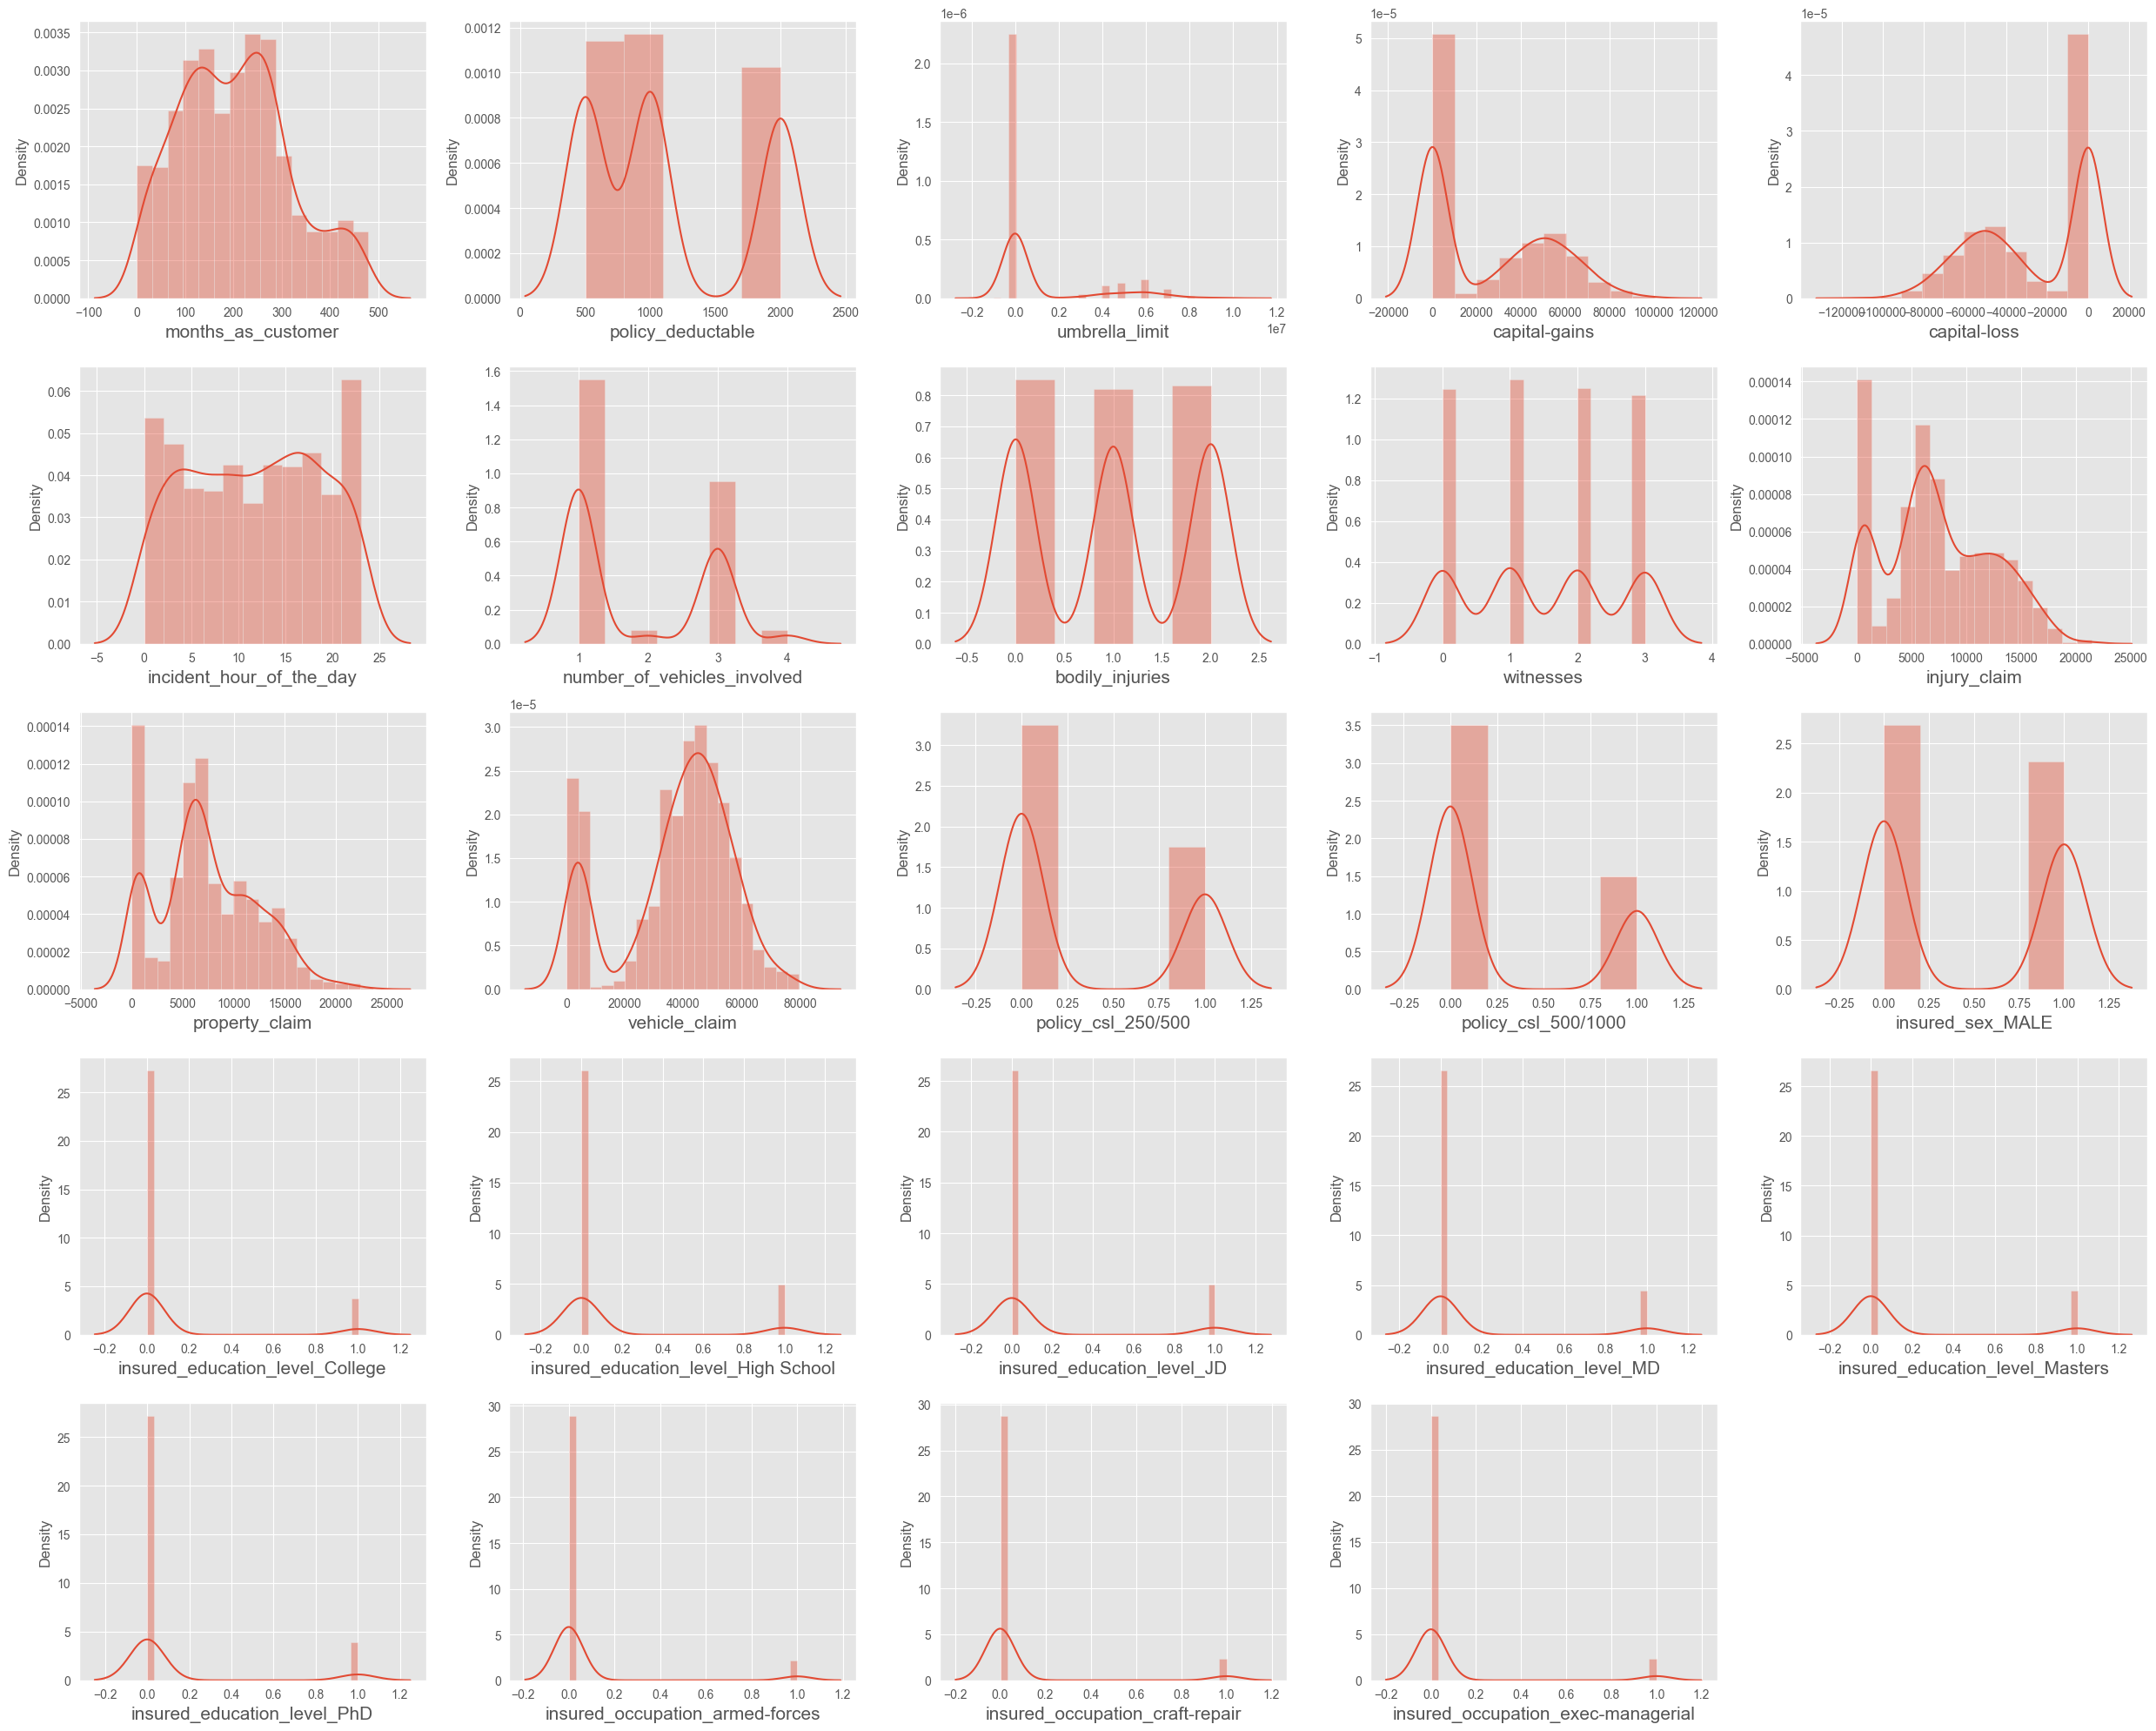

In [79]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

##### 6、异常值检测

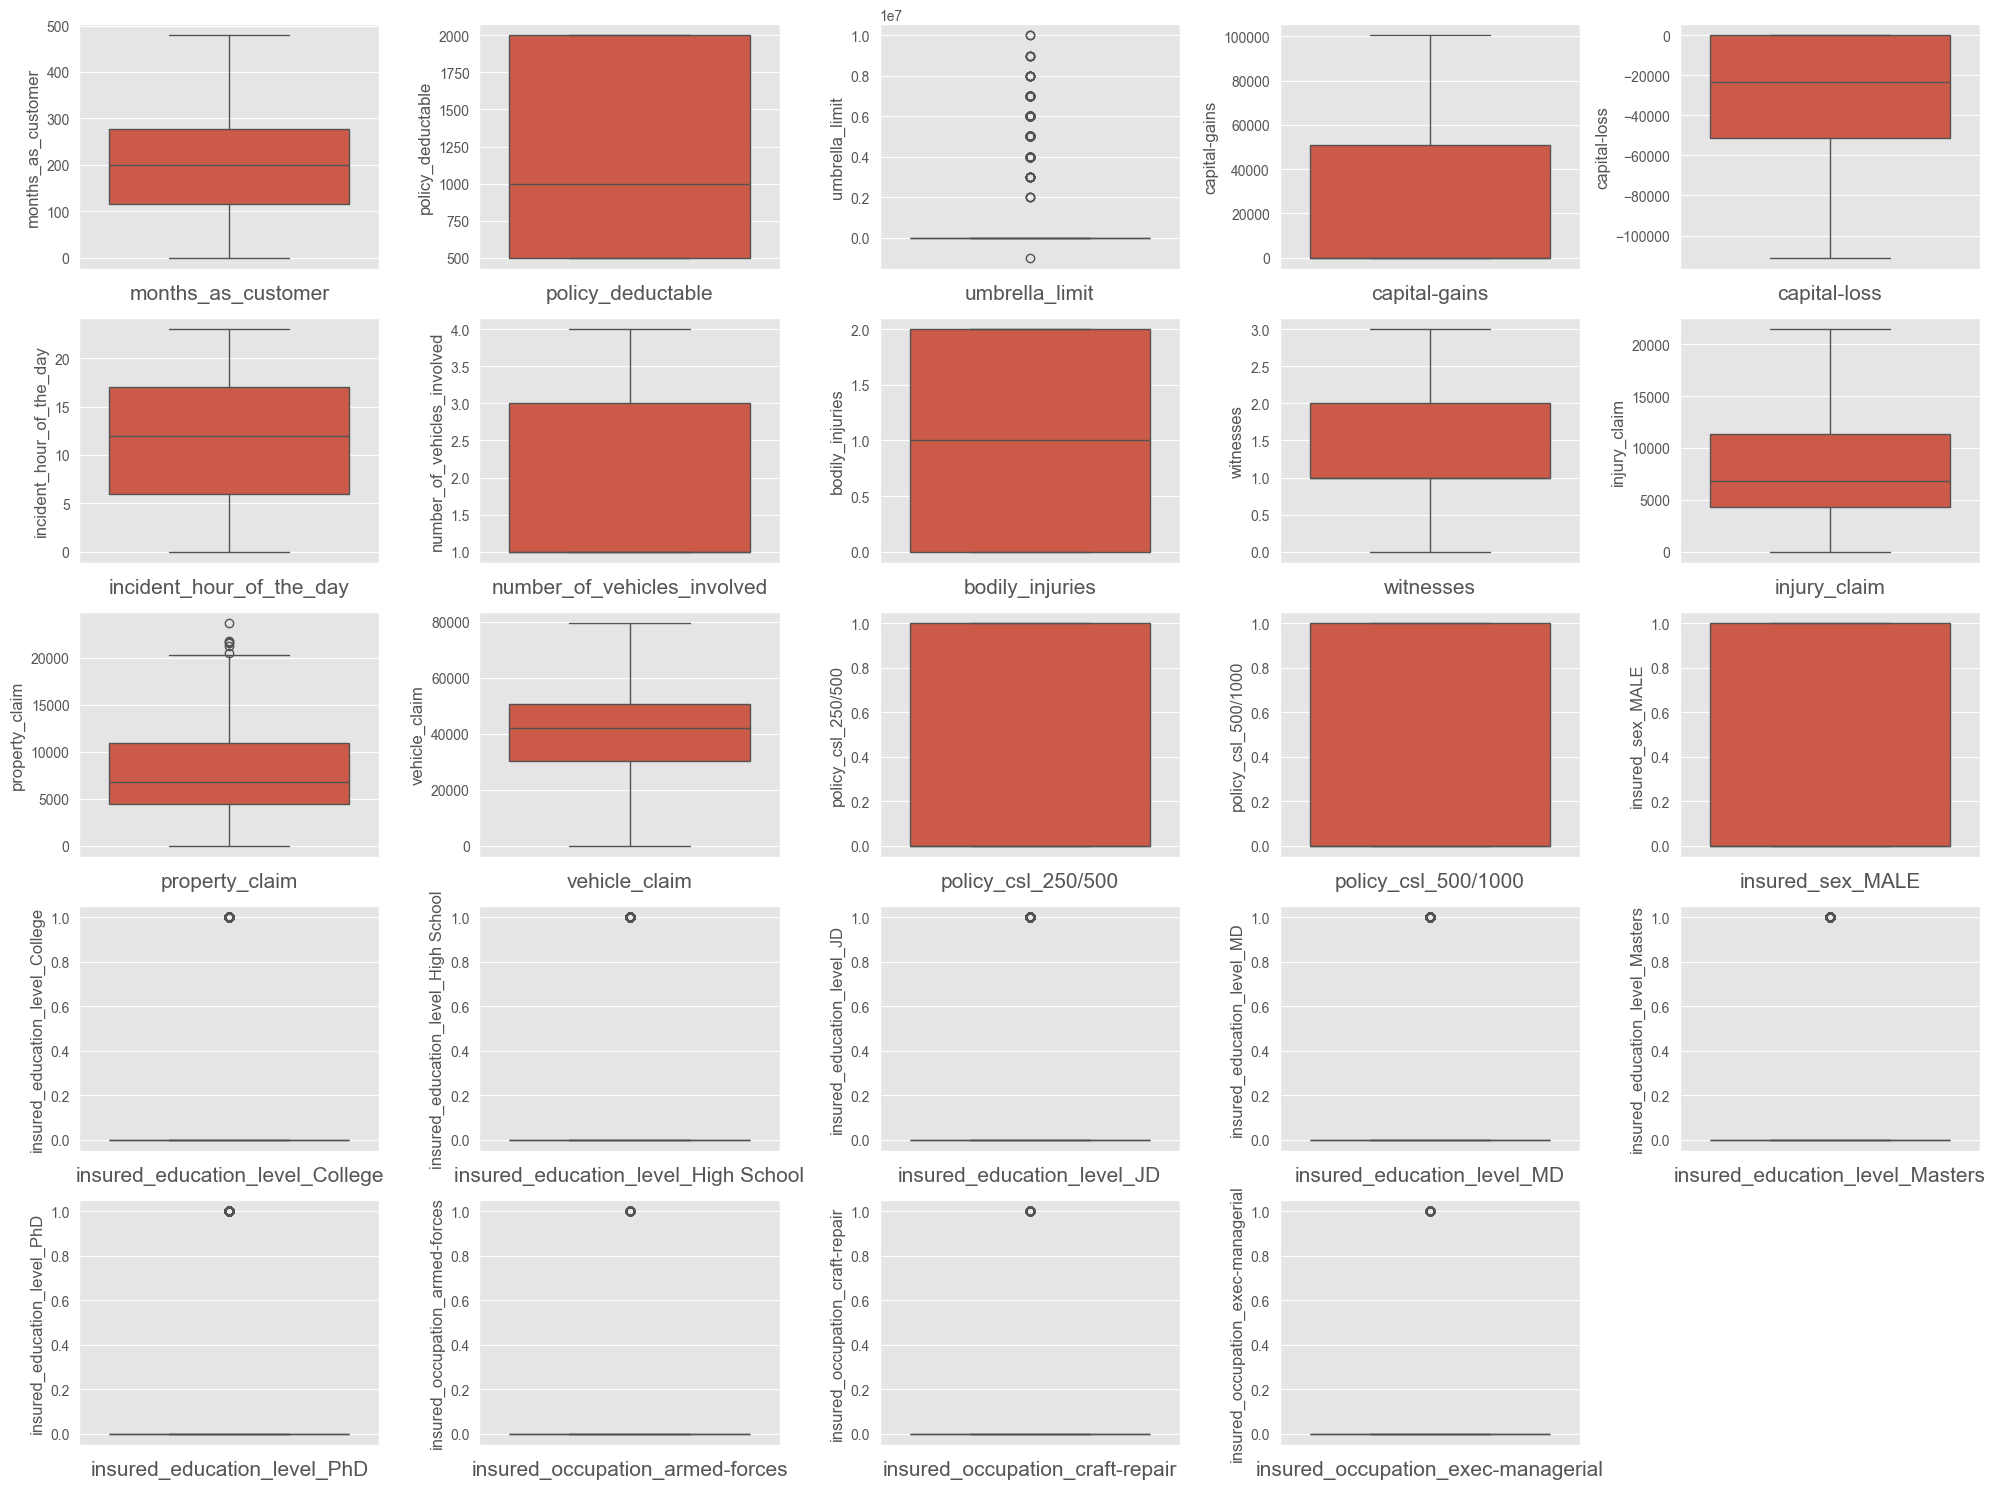

In [80]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

##### 7、数值型特征处理

In [81]:
# 划分测试集和训练集

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [82]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
262,232,500,8000000,0,-33600,17,3,0,1,7060,...,True,False,False,False,False,False,False,False,False,False
314,91,2000,8000000,43900,0,13,3,2,0,13000,...,False,True,True,False,False,False,True,False,True,False
511,283,1000,0,0,-46200,9,1,2,3,820,...,True,False,False,False,True,False,False,True,False,False
981,50,2000,0,0,-65800,15,3,1,2,6110,...,False,False,False,True,False,False,False,True,False,False
412,247,2000,0,64000,0,22,3,2,2,11580,...,False,False,True,False,False,True,False,False,False,False


In [83]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [84]:
# 数值型特征缩放

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [85]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
262,0.220604,-1.052879,2.976963,-0.911353,-0.248349,0.777308,1.119396,-1.215005,-0.454970,-0.045907,1.351108,0.618411
314,-1.001572,1.381836,2.976963,0.677820,0.955236,0.198092,1.119396,1.234602,-1.360083,1.180136,1.123219,1.090291
511,0.662668,-0.241307,-0.473922,-0.911353,-0.699694,-0.381124,-0.835312,1.234602,1.355256,-1.333872,-1.355074,-1.694219
981,-1.356957,1.381836,-0.473922,-0.911353,-1.401785,0.487700,1.119396,0.009798,0.450143,-0.241991,0.964510,0.272815
412,0.350623,1.381836,-0.473922,1.405437,0.955236,1.501328,1.119396,1.234602,0.450143,0.887042,0.834288,0.457306


In [86]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [87]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [88]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
262,0.220604,-1.052879,2.976963,-0.911353,-0.248349,0.777308,1.119396,-1.215005,-0.454970,-0.045907,...,True,False,False,False,False,False,False,False,False,False
314,-1.001572,1.381836,2.976963,0.677820,0.955236,0.198092,1.119396,1.234602,-1.360083,1.180136,...,False,True,True,False,False,False,True,False,True,False
511,0.662668,-0.241307,-0.473922,-0.911353,-0.699694,-0.381124,-0.835312,1.234602,1.355256,-1.333872,...,True,False,False,False,True,False,False,True,False,False
981,-1.356957,1.381836,-0.473922,-0.911353,-1.401785,0.487700,1.119396,0.009798,0.450143,-0.241991,...,False,False,False,True,False,False,False,True,False,False
412,0.350623,1.381836,-0.473922,1.405437,0.955236,1.501328,1.119396,1.234602,0.450143,0.887042,...,False,False,True,False,False,True,False,False,False,False


### 模型构建

* 支持向量机

In [89]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [90]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8733333333333333
Test accuracy of Support Vector Classifier is : 0.772
[[193   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       193
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



* 决策树

In [91]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [92]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.452
[[100  93]
 [ 44  13]]
              precision    recall  f1-score   support

           N       0.69      0.52      0.59       193
           Y       0.12      0.23      0.16        57

    accuracy                           0.45       250
   macro avg       0.41      0.37      0.38       250
weighted avg       0.56      0.45      0.49       250



In [93]:
# 参数调优

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': range(2, 10), 'min_samples_split': range(2, 10)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter

In [94]:

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.8213333333333332


In [95]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [96]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.824
Test accuracy of Decision Tree is : 0.772
[[153  40]
 [ 17  40]]
              precision    recall  f1-score   support

           N       0.90      0.79      0.84       193
           Y       0.50      0.70      0.58        57

    accuracy                           0.77       250
   macro avg       0.70      0.75      0.71       250
weighted avg       0.81      0.77      0.78       250



* 随机森林

In [97]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [98]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.972
Test accuracy of Random Forest is : 0.764
[[156  37]
 [ 22  35]]
              precision    recall  f1-score   support

           N       0.88      0.81      0.84       193
           Y       0.49      0.61      0.54        57

    accuracy                           0.76       250
   macro avg       0.68      0.71      0.69       250
weighted avg       0.79      0.76      0.77       250



### 模型比较

In [99]:
models = pd.DataFrame({
    'Model' : ['SVC', 'Decision Tree', 'Random Forest'],
    'Score' : [svc_test_acc,  dtc_test_acc, rand_clf_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,SVC,0.772
1,Decision Tree,0.772
2,Random Forest,0.764
